<a href="https://colab.research.google.com/github/HernanDL/Noise-Cancellation-Using-GenAI/blob/main/Deep_Noise_Suppression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install necessary libraries
!pip install torch torchaudio matplotlib

# Clone the DNS-Challenge repository
!git clone https://github.com/microsoft/DNS-Challenge.git
%cd DNS-Challenge

# Download the pre-trained DNS model
!wget https://github.com/microsoft/DNS-Challenge/releases/download/v1.0/dns48.onnx

# Import necessary modules
import torch
import torchaudio
import matplotlib.pyplot as plt
import onnxruntime as ort
from google.colab import files

# Step 1: Upload your audio file from local machine
uploaded = files.upload()

# Step 2: Get the file name from the upload
audio_file_name = next(iter(uploaded))  # Get the uploaded file name

# Step 3: Load the audio file using torchaudio
noisy_audio, sample_rate = torchaudio.load(audio_file_name)


# Function to apply the DNS model
def apply_dns_model(noisy_audio):
    ort_session = ort.InferenceSession('dns48.onnx')
    input_name = ort_session.get_inputs()[0].name
    output_name = ort_session.get_outputs()[0].name
    enhanced_audio = ort_session.run([output_name], {input_name: noisy_audio.numpy()})[0]
    return torch.tensor(enhanced_audio)

# Apply the DNS model to suppress noise
enhanced_audio = apply_dns_model(noisy_audio)

# Save the enhanced audio
torchaudio.save('enhanced_audio.wav', enhanced_audio, sample_rate)

# Plot the waveforms
def plot_waveform(waveform, sample_rate, title="Waveform"):
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1, figsize=(15, 4))
    if num_channels == 1:
        axes = [axes]
    for i, ax in enumerate(axes):
        ax.plot(time_axis.numpy(), waveform[i].numpy(), linewidth=1)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude')
        ax.set_title(f'{title} - Channel {i+1}')
    plt.show()

# Plot the input noisy audio
plot_waveform(noisy_audio, sample_rate, title="Noisy Audio")

# Plot the enhanced audio
plot_waveform(enhanced_audio, sample_rate, title="Enhanced Audio")

# Download the enhanced audio file
from google.colab import files
files.download('enhanced_audio.wav')


Cloning into 'DNS-Challenge'...
remote: Enumerating objects: 1284985, done.
remote: Counting objects: 100% (619/619), done.
remote: Compressing objects: 100% (339/339), done.
remote: Total 1284985 (delta 303), reused 556 (delta 274), pack-reused 1284366 (from 1)
Receiving objects: 100% (1284985/1284985), 275.02 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (677/677), done.
/content/DNS-Challenge/DNS-Challenge
--2024-10-03 19:12:28--  https://github.com/microsoft/DNS-Challenge/releases/download/v1.0/dns48.onnx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-03 19:12:28 ERROR 404: Not Found.



Saving 5-9032-A-0.wav to 5-9032-A-0.wav


NoSuchFile: [ONNXRuntimeError] : 3 : NO_SUCHFILE : Load model from dns48.onnx failed:Load model dns48.onnx failed. File doesn't exist

In [1]:
# Install necessary libraries
!pip install torch torchaudio soundfile onnxruntime matplotlib

# Clone Microsoft's DNS Challenge repository
!git clone https://github.com/microsoft/DNS-Challenge.git

# Download the pretrained DNS model in ONNX format
!wget -P DNS-Challenge/inference/dns_model https://github.com/microsoft/DNS-Challenge/releases/download/v1.0/dns48.onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.8 MB/s eta 0:00:00
Cloning into 'DNS-Challenge'...
remote: Enumerating objects: 1284985, done.
remote: Counting objects: 100% (619/619), done.
remote: Compressing objects: 100% (334/334), done.
remote: Total 1284985 (delta 305), reused 561 (delta 279), pack-reused 1284366 (from 1)
Receiving objects: 100% (1284985/1284985), 275.02 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (679/679), done.
--2024-10-03 18:44:26--  https://github.com/microsoft/DNS-Challenge/releases/download/v1.0/dns48.onnx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-03 18:44:26 ERROR 404: Not Found.



Saving 5-9032-A-0.wav to 5-9032-A-0.wav


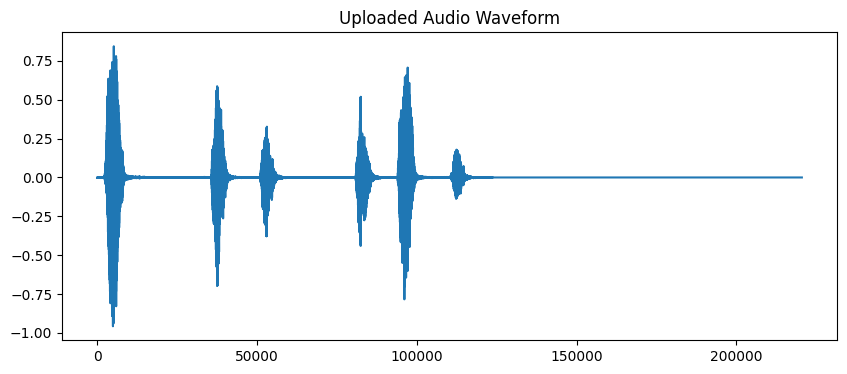

In [2]:
# Import necessary libraries for file upload and processing
import torchaudio
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Step 1: Upload your audio file from local machine
uploaded = files.upload()

# Step 2: Get the file name from the upload
audio_file_name = next(iter(uploaded))  # Get the uploaded file name

# Step 3: Load the audio file using torchaudio
audio_data, sr = torchaudio.load(audio_file_name)

# Plot the waveform of the uploaded audio
plt.figure(figsize=(10, 4))
plt.plot(audio_data.t().numpy())  # Transpose for proper plotting
plt.title('Uploaded Audio Waveform')
plt.show()


In [3]:
# Import ONNX Runtime for loading the DNS model
import onnxruntime as ort

# Step 4: Define function to apply the DNS model
def dns_suppression(audio_data, sr):
    # If the sample rate is not 16 kHz, we need to resample (DNS model expects 16 kHz input)
    if sr != 16000:
        audio_data = torchaudio.transforms.Resample(sr, 16000)(audio_data)
        sr = 16000

    # Load the DNS model (ONNX format)
    ort_session = ort.InferenceSession('DNS-Challenge/inference/dns_model/dns48.onnx')

    # Run inference using the DNS model
    input_audio = audio_data.t().numpy().astype(np.float32)
    enhanced_audio = ort_session.run(None, {'input': input_audio})[0][0]

    # Return the enhanced (noise-suppressed) audio and sample rate
    return enhanced_audio, sr

# Step 5: Apply the DNS model to the uploaded audio file
enhanced_audio, enhanced_sr = dns_suppression(audio_data, sr)

# Save the enhanced audio to file
sf.write('enhanced_audio.wav', enhanced_audio, enhanced_sr)

# Plot the waveform of the enhanced (noise-suppressed) audio
plt.figure(figsize=(10, 4))
plt.plot(enhanced_audio)
plt.title('Enhanced Audio Waveform After DNS')
plt.show()


NoSuchFile: [ONNXRuntimeError] : 3 : NO_SUCHFILE : Load model from DNS-Challenge/inference/dns_model/dns48.onnx failed:Load model DNS-Challenge/inference/dns_model/dns48.onnx failed. File doesn't exist